# Data Analysis of the DSAD

In [1]:
from pycocotools.coco import COCO
import os

In [24]:
# First obtain the json files for each training split

root = r"C:\Users\jayan\Documents\MECHATRONICS YR4\MECH5845M - Professional Project\DSAD4DeTr_multilabel_OD"
# root = r"C:\Users\jayan\Documents\MECHATRONICS YR4\MECH5845M - Professional Project\DSAD4DeTr"
subsets = ['val', 'test', 'train']

In [25]:
# Create COCO class instantiation function
def createCOCO(root_path, mode):
    filename = f"{mode}_OD_annotations.json"
    # filename = f"{mode}_annotations.json"
    annFile = os.path.join(root_path, mode, 'annotations', filename)
    coco = COCO(annFile)

    return coco

In [26]:
from pprint import pprint

# Define structure for stat storage
base_dict = {
    "bbox": 0,
    "segm": 0,
    "instances": 0,
    "images": 0
}

no_classes = 7
class_dict = {1: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
    2: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
    3: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
    4: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
    5: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
    6: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
    7: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0}
    }

# no_classes = 11
# class_dict = {1: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
#     2: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
#     3: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
#     4: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
#     5: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
#     6: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
#     7: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
#     8: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
#     9: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
#     10: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
#     11: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0}
#     }

# for i in range(no_classes):
#     key = i+1
#     class_dict[key] = base_dict

pprint(class_dict)

{1: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
 2: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
 3: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
 4: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
 5: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
 6: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0},
 7: {'bbox': 0, 'images': 0, 'instances': 0, 'segm': 0}}


In [45]:
# Test extraction of surgery number
test_id = 21247
test_id_str = str(test_id)
surgery_no = int(test_id_str[1:3])
print(surgery_no)

# Test extraction of surgery number
test_id = 1112956
test_id_str = str(test_id)
surgery_no = int(test_id_str[3:5])
print(surgery_no)

12
29


In [31]:
# Fill out dictionary storing stats for each surgery
import copy

# Initialise surgery dict
surgery_dict = {}

# # 0>bbox, 1>segm, 2>instances, 3>images
class_dict_template = {
    1: {0: 0, 1: 0, 2: 0, 3: 0},
    2: {0: 0, 1: 0, 2: 0, 3: 0},
    3: {0: 0, 1: 0, 2: 0, 3: 0},
    4: {0: 0, 1: 0, 2: 0, 3: 0},
    5: {0: 0, 1: 0, 2: 0, 3: 0},
    6: {0: 0, 1: 0, 2: 0, 3: 0},
    7: {0: 0, 1: 0, 2: 0, 3: 0}
}

# class_dict_template = {
#     1: {0: 0, 1: 0, 2: 0, 3: 0},
#     2: {0: 0, 1: 0, 2: 0, 3: 0},
#     3: {0: 0, 1: 0, 2: 0, 3: 0},
#     4: {0: 0, 1: 0, 2: 0, 3: 0},
#     5: {0: 0, 1: 0, 2: 0, 3: 0},
#     6: {0: 0, 1: 0, 2: 0, 3: 0},
#     7: {0: 0, 1: 0, 2: 0, 3: 0},
#     8: {0: 0, 1: 0, 2: 0, 3: 0},
#     9: {0: 0, 1: 0, 2: 0, 3: 0},
#     10: {0: 0, 1: 0, 2: 0, 3: 0},
#     11: {0: 0, 1: 0, 2: 0, 3: 0}
# }

for subset in subsets:
    # Create coco object
    coco = createCOCO(root, subset)
    # Get list of the image IDs present
    imageIDs = coco.getImgIds()

    for image in imageIDs:
        image_str = str(image)
        surgery_no = int(image_str[1:3]) # Get surgery number from image ID
        # surgery_no = int(image_str[3:5]) # Get surgery number from image ID - 11 classes
        
        categories = set() # Reinitialise set for storing the classes present in image

        # Get the annotations for the image
        annIDs = coco.getAnnIds(imgIds=image)
        anns = coco.loadAnns(annIDs)

        for ann in anns:
            # Store the class as being present in this image
            cat_id = ann['category_id']
            categories.add(cat_id)
            
            # Obtain the bbox and segmentation areas
            bbox_area = ann['bbox'][2] * ann['bbox'][3]
            segm_area = ann['area']

            # Create surgery no field in the dictionary if not present already
            if surgery_no not in surgery_dict.keys():
                surgery_dict[surgery_no] = copy.deepcopy(class_dict_template)
            
            # Update fields for the corresponding surgery and class
            surgery_dict[surgery_no][cat_id][0] += bbox_area
            surgery_dict[surgery_no][cat_id][1] += segm_area
            surgery_dict[surgery_no][cat_id][2] += 1
        
        # Update the number of images each class has appeared in
        for cat in categories:
            surgery_dict[surgery_no][cat][3] += 1

pprint(surgery_dict)

loading annotations into memory...
Done (t=0.24s)
creating index...
index created!
loading annotations into memory...
Done (t=0.38s)
creating index...
index created!
loading annotations into memory...
Done (t=0.82s)
creating index...
index created!
{2: {1: {0: 6335429, 1: 3358529.0, 2: 84, 3: 54},
     2: {0: 4186183, 1: 2435087.0, 2: 76, 3: 35},
     3: {0: 1975098, 1: 1241974.0, 2: 19, 3: 19},
     4: {0: 1339553, 1: 682564.5, 2: 41, 3: 28},
     5: {0: 8426197, 1: 4642689.5, 2: 110, 3: 70},
     6: {0: 0, 1: 0, 2: 0, 3: 0},
     7: {0: 0, 1: 0, 2: 0, 3: 0}},
 3: {1: {0: 15923259, 1: 8483998.0, 2: 80, 3: 70},
     2: {0: 2178732, 1: 1111899.0, 2: 101, 3: 33},
     3: {0: 23798991, 1: 14403859.0, 2: 89, 3: 68},
     4: {0: 159303, 1: 97776.5, 2: 14, 3: 14},
     5: {0: 16058776, 1: 7831586.0, 2: 143, 3: 84},
     6: {0: 777674, 1: 510471.5, 2: 13, 3: 13},
     7: {0: 0, 1: 0, 2: 0, 3: 0}},
 4: {1: {0: 3947601, 1: 1828746.0, 2: 37, 3: 29},
     2: {0: 342108, 1: 173738.5, 2: 36, 3: 27}

In [32]:
def getSubset(surgery_no):
    """
    Function to obtain the correct subset for each surgery number using
    the split from Kolbinger et al. (2023)
    """
    # Define dictionary lookup with integer keys
    lookup = {
        1: 'train',
        4: 'train',
        5: 'train',
        6: 'train',
        8: 'train',
        9: 'train',
        10: 'train',
        12: 'train',
        15: 'train',
        16: 'train',
        17: 'train',
        19: 'train',
        22: 'train',
        23: 'train',
        24: 'train',
        25: 'train',
        27: 'train',
        28: 'train',
        29: 'train',
        30: 'train',
        31: 'train',
        3: 'val',
        21: 'val',
        26: 'val',
        2: 'test',
        7: 'test',
        11: 'test',
        13: 'test',
        14: 'test',
        18: 'test',
        20: 'test',
        32: 'test'
    }

    return lookup[surgery_no]

In [34]:
import numpy as np

# Convert surgery_dict into a matrix
results = np.zeros((4, 32, no_classes)) # 4 fields x 32 surgeries x 7 classes

for surgery, classes in surgery_dict.items():
    for class_id, fields in classes.items():
        for field, value in fields.items():
            results[field][surgery-1][class_id-1] = value

# Move stomach back to 7th columns in z dim
results = results[:, :, [0,1,2,3,5,6,4]]

pprint(results)
pprint(results.shape)

array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [6.33542900e+06, 4.18618300e+06, 1.97509800e+06, 1.33955300e+06,
         0.00000000e+00, 0.00000000e+00, 8.42619700e+06],
        [1.59232590e+07, 2.17873200e+06, 2.37989910e+07, 1.59303000e+05,
         7.77674000e+05, 0.00000000e+00, 1.60587760e+07],
        [3.94760100e+06, 3.42108000e+05, 0.00000000e+00, 3.26655000e+05,
         0.00000000e+00, 2.95510000e+04, 1.38888900e+06],
        [1.90633000e+06, 2.42422300e+06, 0.00000000e+00, 2.95975000e+05,
         7.86184000e+05, 0.00000000e+00, 2.84183600e+06],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.45464800e+06, 2.43038400e+06, 0.00000000e+00, 1.74980000e+05,
         0.00000000e+00, 0.00000000e+00, 2.43773100e+06],
        [4.61760700e+06, 3.19419300e+06, 0.00000000e+00, 0.00000000e+00,
         0

In [35]:

# Create train, test, val split
split_results = np.zeros((4, 3, no_classes))

split_mapping = {'train': 0, 'test': 1, 'val': 2}

for y in range(32):
    split = getSubset(y+1)
    output_y = split_mapping[split]
    split_results[:, output_y, :] += results[:, y, :]

print(split_results)
print(split_results.shape)

[[[1.32308355e+08 4.15068520e+07 2.08983370e+07 5.17448700e+06
   7.20070600e+06 8.94470900e+06 8.66939230e+07]
  [3.60118740e+07 3.25156760e+07 2.96867600e+06 3.91742900e+06
   8.95125000e+05 0.00000000e+00 4.42910320e+07]
  [5.56820850e+07 5.80071400e+06 2.51708540e+07 1.59303000e+05
   9.86785000e+05 0.00000000e+00 2.59569710e+07]]

 [[8.05943585e+07 2.32944320e+07 1.28928355e+07 2.65412050e+06
   4.32529950e+06 4.80921550e+06 5.01280065e+07]
  [2.05480660e+07 1.79668410e+07 1.78069100e+06 2.00838750e+06
   6.79662500e+05 0.00000000e+00 2.55860770e+07]
  [2.95443010e+07 3.28310900e+06 1.52755795e+07 9.77765000e+04
   6.58934000e+05 0.00000000e+00 1.32855325e+07]]

 [[6.64000000e+02 7.06000000e+02 1.02000000e+02 1.94000000e+02
   7.20000000e+01 1.35000000e+02 1.02200000e+03]
  [3.92000000e+02 4.57000000e+02 5.90000000e+01 1.61000000e+02
   4.00000000e+00 0.00000000e+00 4.62000000e+02]
  [2.69000000e+02 1.55000000e+02 1.02000000e+02 1.40000000e+01
   2.00000000e+01 0.00000000e+00 3.19

In [36]:
# Sum the classes so you have a total for each field in each set
split_results_classes_summed = split_results.sum(axis=2, keepdims=True)
pprint(split_results_classes_summed.shape)
pprint(split_results_classes_summed)

print(split_results[0][0][0] / split_results_classes_summed [0][0][0])
print(split_results[0][1][0] / split_results_classes_summed [0][1][0])

(4, 3, 1)
array([[[3.02727369e+08],
        [1.20599812e+08],
        [1.13756712e+08]],

       [[1.78698268e+08],
        [6.85697250e+07],
        [6.21452325e+07]],

       [[2.89500000e+03],
        [1.53500000e+03],
        [8.79000000e+02]],

       [[2.12000000e+03],
        [1.03500000e+03],
        [5.69000000e+02]]])
0.43705448713492434
0.29860638588723504


In [45]:
# Calculate the proportion array to store the proportion of each classes fields within each split

# Divide the output_array by the expanded summed_output_array
proportions = 100 * split_results / split_results_classes_summed

print(proportions.shape)

# Check that the sum of proportions is 1 for each field
sum_proportions = np.sum(proportions, axis=2)
print("\nSum of proportions for each field (should be 1):")
print(sum_proportions)

(4, 3, 7)

Sum of proportions for each field (should be 1):
[[100. 100. 100.]
 [100. 100. 100.]
 [100. 100. 100.]
 [100. 100. 100.]]


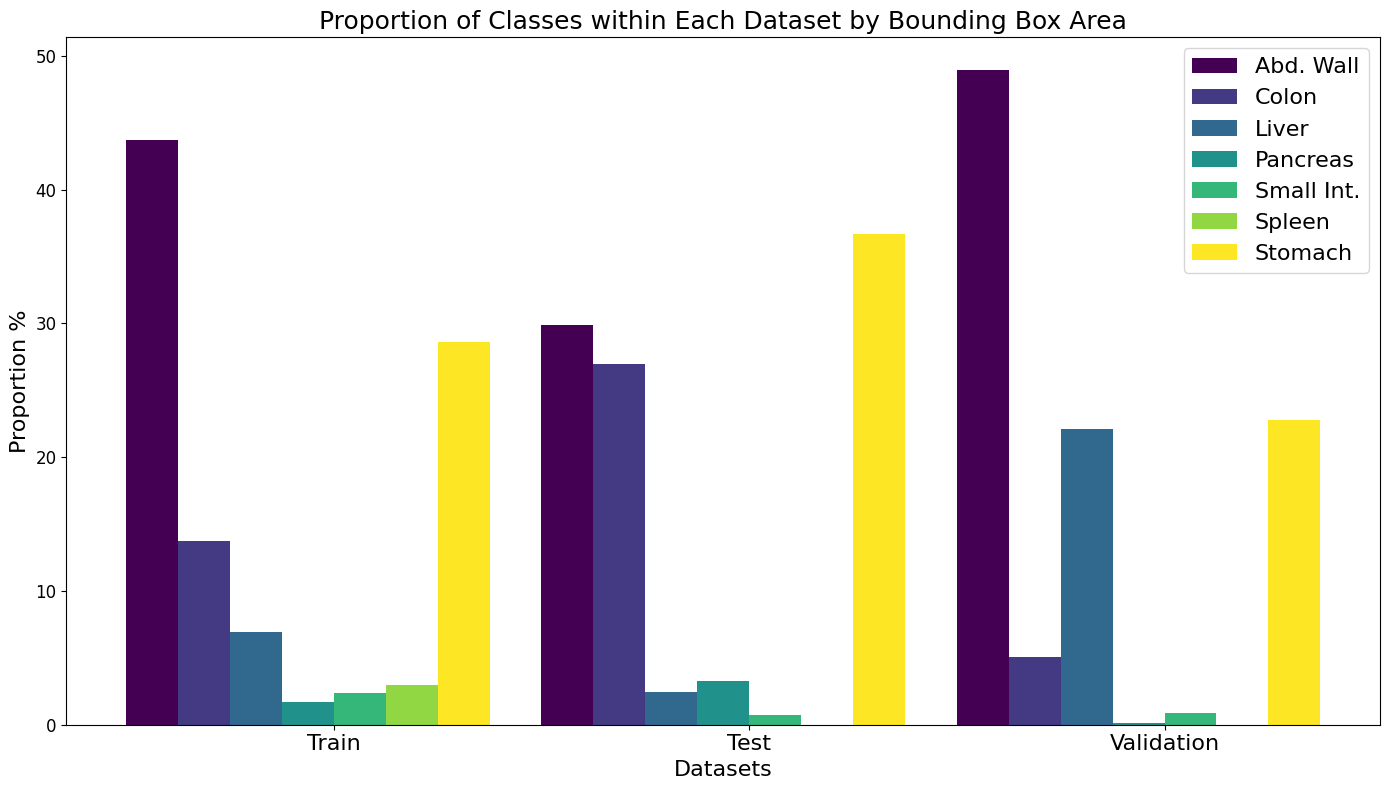

In [48]:
# Plot results
import matplotlib.pyplot as plt

# Extract the relevant part of the proportions array (by bounding box area)
proportions_to_plot = proportions[0, :, :]

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Number of datasets and classes
num_datasets = proportions_to_plot.shape[0]
num_classes = proportions_to_plot.shape[1]
class_names = ['Abd. Wall', 'Colon', 'Liver', 'Pancreas', 'Small Int.', 'Spleen', 'Stomach']
# class_names = ['Abdominal Wall', 'Colon', 'IMA', 'IV', 'Liver', 'Pancreas', 'Small Intestine', 'Spleen', 'Stomach', 'Ureter', 'VG']

# Width of a single bar
bar_width = 0.1

# Colors for each class
colors = plt.cm.viridis(np.linspace(0, 1, num_classes))

# X positions for each dataset
x_positions = np.arange(num_datasets) * (num_classes + 1) * bar_width

# Plotting
for j in range(num_classes):
    # Calculate position for each class bar in each dataset
    bar_positions = x_positions + j * bar_width
    ax.bar(bar_positions, proportions_to_plot[:, j], bar_width, label=class_names[j], color=colors[j])

# Set labels and title with increased fontsize
ax.set_xlabel('Datasets', fontsize=16)
ax.set_ylabel('Proportion %', fontsize=16)
ax.set_title('Proportion of Classes within Each Dataset by Bounding Box Area', fontsize=18)

# Set x-ticks to be in the center of the grouped bars and increase fontsize
datasets = ['Train', 'Test', 'Validation']
ax.set_xticks(x_positions + (num_classes / 2) * bar_width)
ax.set_xticklabels([f'{datasets[i]}' for i in range(num_datasets)], fontsize=16)

# Increase the fontsize for y-axis ticks
ax.tick_params(axis='y', labelsize=12)

# Add legend inside the chart area with increased fontsize
ax.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=16)

# Show plot
plt.tight_layout()
plt.show()

In [49]:
# Create class-field array, totalling across whole dataset
total_results = np.sum(split_results, axis=1)
pprint(total_results.shape)
pprint(total_results)

(4, 7)
array([[2.24002314e+08, 7.98232420e+07, 4.90378670e+07, 9.25121900e+06,
        9.08261600e+06, 8.94470900e+06, 1.56941926e+08],
       [1.30686726e+08, 4.45443820e+07, 2.99491060e+07, 4.76028450e+06,
        5.66389600e+06, 4.80921550e+06, 8.89996160e+07],
       [1.32500000e+03, 1.31800000e+03, 2.63000000e+02, 3.69000000e+02,
        9.60000000e+01, 1.35000000e+02, 1.80300000e+03],
       [9.56000000e+02, 7.12000000e+02, 2.33000000e+02, 2.08000000e+02,
        7.80000000e+01, 1.07000000e+02, 1.43000000e+03]])


C:\Users\jayan\AppData\Local\Temp\ipykernel_10232\4217366124.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 4)


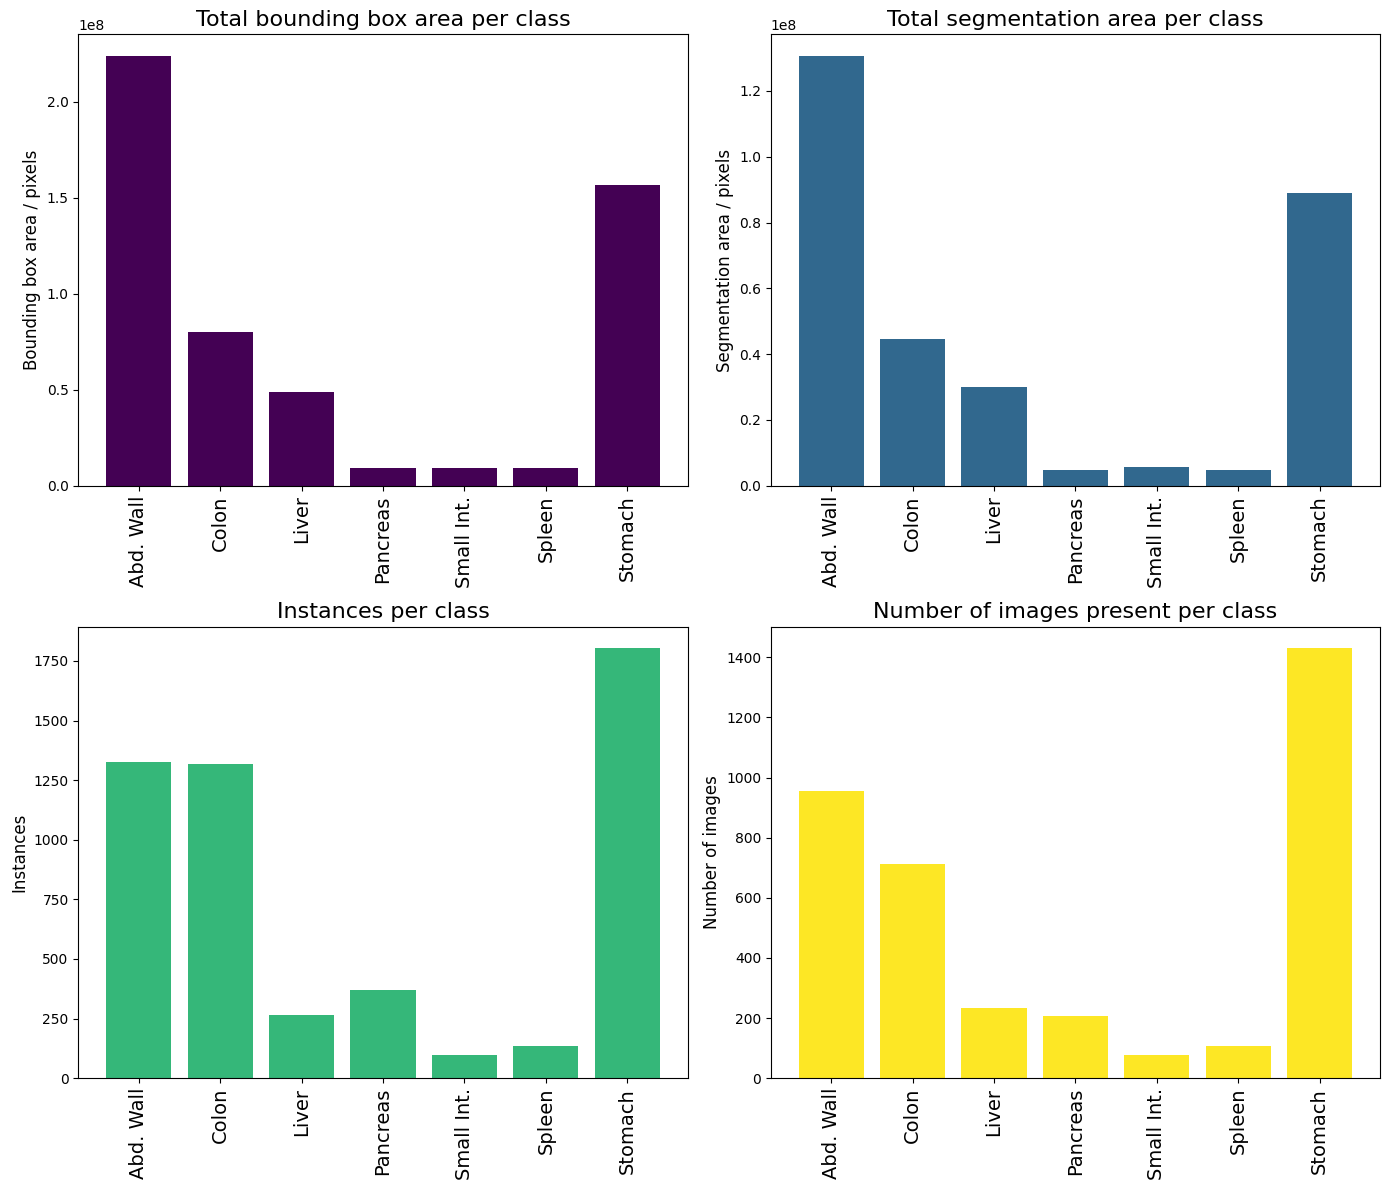

In [55]:
import matplotlib.cm as cm

# Plot bbox (0) and segm (1) for each class

# Define class names
class_names = ['Abd. Wall', 'Colon', 'Liver', 'Pancreas', 'Small Int.', 'Spleen', 'Stomach']
# class_names = ['Abdominal Wall', 'Colon', 'Inf. Mesen. Artery', 'Intestinal Veins', 'Liver', 'Pancreas', 'Small Intestine', 'Spleen', 'Stomach', 'Ureter', 'Vesicular Glands']

# Create subarrays
subarray_0 = total_results[0, :]
subarray_1 = total_results[1, :]
subarray_2 = total_results[2, :]
subarray_3 = total_results[3, :]

# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Define a colormap
viridis = cm.get_cmap('viridis', 4)

def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Plot for subarray [0, :]
bars_0 = axes[0, 0].bar(np.arange(len(subarray_0)), subarray_0, color=viridis(0))
axes[0, 0].set_title('Total bounding box area per class', fontsize=16)
axes[0, 0].set_ylabel('Bounding box area / pixels', fontsize=12)
axes[0, 0].set_xticks(np.arange(len(class_names)))
axes[0, 0].set_xticklabels(class_names, rotation=90, fontsize=14)

# Plot for subarray [1, :]
bars_1 = axes[0, 1].bar(np.arange(len(subarray_1)), subarray_1, color=viridis(1))
axes[0, 1].set_title('Total segmentation area per class', fontsize=16)
axes[0, 1].set_ylabel('Segmentation area / pixels', fontsize=12)
axes[0, 1].set_xticks(np.arange(len(class_names)))
axes[0, 1].set_xticklabels(class_names, rotation=90, fontsize=14)

# Plot for subarray [2, :]
bars_2 = axes[1, 0].bar(np.arange(len(subarray_2)), subarray_2, color=viridis(2))
axes[1, 0].set_title('Instances per class', fontsize=16)
axes[1, 0].set_ylabel('Instances', fontsize=12)
axes[1, 0].set_xticks(np.arange(len(class_names)))
axes[1, 0].set_xticklabels(class_names, rotation=90, fontsize=14)

# Plot for subarray [3, :]
bars_3 = axes[1, 1].bar(np.arange(len(subarray_3)), subarray_3, color=viridis(3))
axes[1, 1].set_title('Number of images present per class', fontsize=16)
axes[1, 1].set_ylabel('Number of images', fontsize=12)
axes[1, 1].set_xticks(np.arange(len(class_names)))
axes[1, 1].set_xticklabels(class_names, rotation=90, fontsize=14)

# # Set the y-axis limit for the [1, 1] graph
# axes[1, 0].set_ylim(0, 2000)
# axes[1, 1].set_ylim(0, 2000)

# Add a title to the entire grid
# fig.suptitle('Class Representation of Entire DSAD', fontsize=16)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

C:\Users\jayan\AppData\Local\Temp\ipykernel_10232\550639325.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', 4)  # 4 different colors for 4 charts


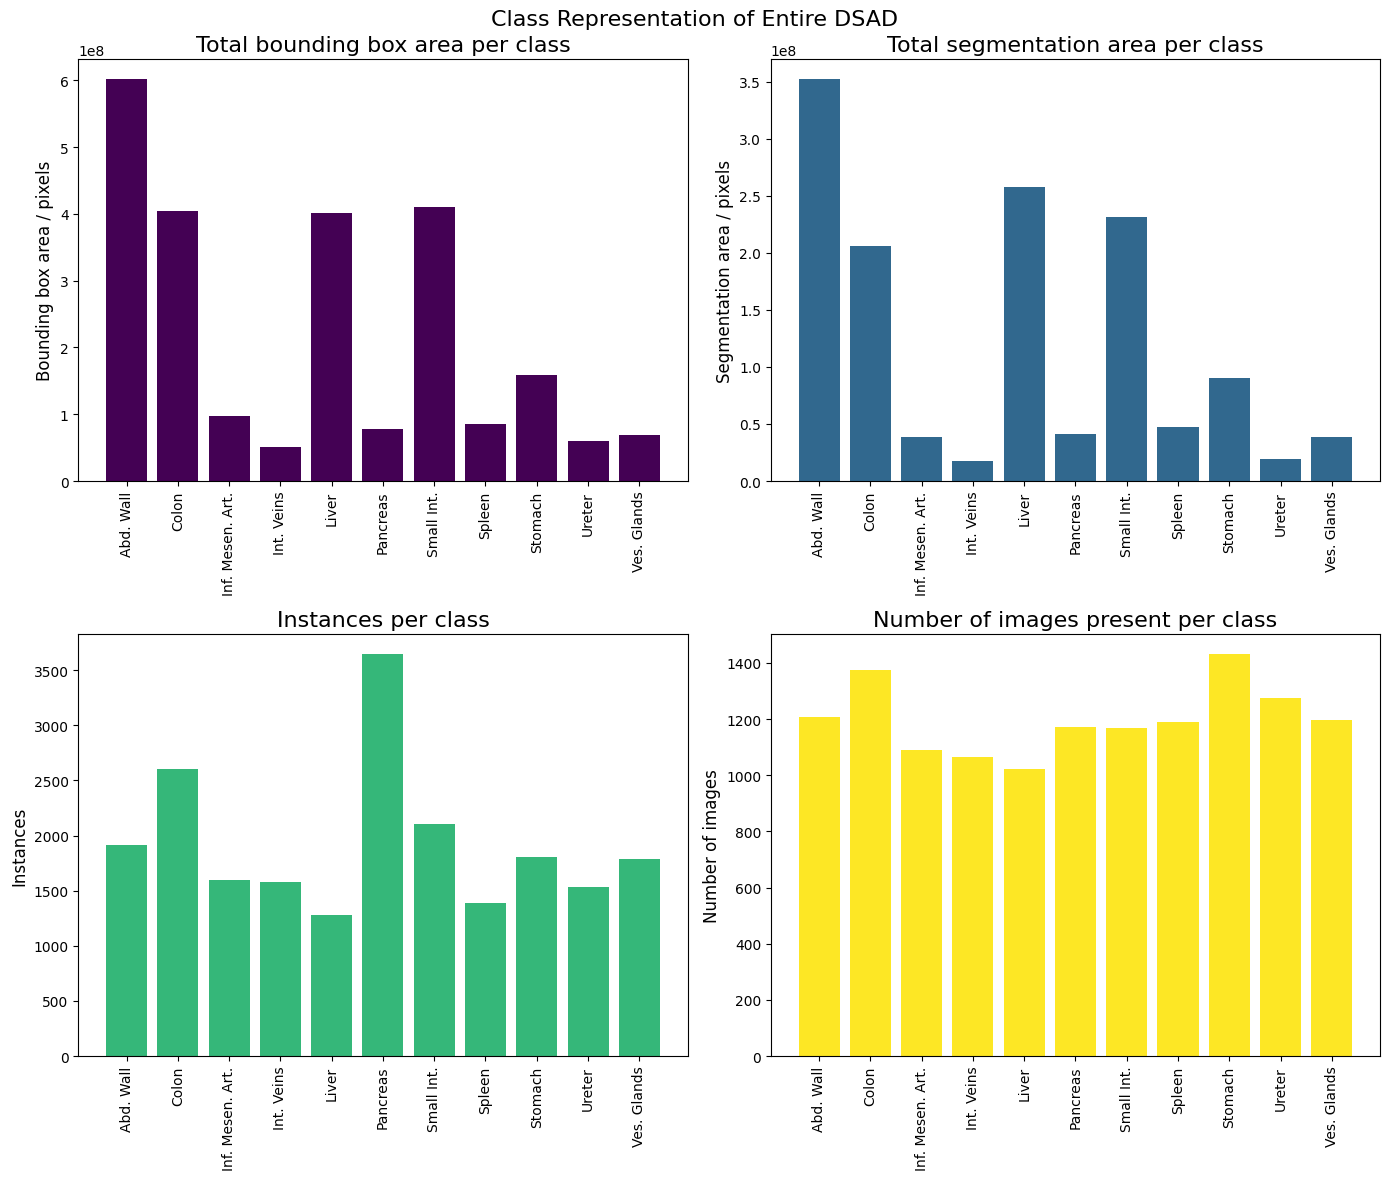

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Define class names
class_names = ['Abd. Wall', 'Colon', 'Inf. Mesen. Art.', 'Int. Veins', 'Liver', 'Pancreas', 'Small Int.', 'Spleen', 'Stomach', 'Ureter', 'Ves. Glands']

# Create subarrays
subarray_0 = total_results[0, :]
subarray_1 = total_results[1, :]
subarray_2 = total_results[2, :]
subarray_3 = total_results[3, :]

# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Define a colormap
viridis = cm.get_cmap('viridis', 4)  # 4 different colors for 4 charts

def add_value_labels(ax, bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=16)  # Adjust the fontsize here as needed

# Plot for subarray [0, :]
bars_0 = axes[0, 0].bar(np.arange(len(subarray_0)), subarray_0, color=viridis(0))
axes[0, 0].set_title('Total bounding box area per class', fontsize=16)
axes[0, 0].set_ylabel('Bounding box area / pixels', fontsize=12)
axes[0, 0].set_xticks(np.arange(len(class_names)))
axes[0, 0].set_xticklabels(class_names, rotation=90, fontsize=10)

# Plot for subarray [1, :]
bars_1 = axes[0, 1].bar(np.arange(len(subarray_1)), subarray_1, color=viridis(1))
axes[0, 1].set_title('Total segmentation area per class', fontsize=16)
axes[0, 1].set_ylabel('Segmentation area / pixels', fontsize=12)
axes[0, 1].set_xticks(np.arange(len(class_names)))
axes[0, 1].set_xticklabels(class_names, rotation=90, fontsize=10)

# Plot for subarray [2, :]
bars_2 = axes[1, 0].bar(np.arange(len(subarray_2)), subarray_2, color=viridis(2))
axes[1, 0].set_title('Instances per class', fontsize=16)
axes[1, 0].set_ylabel('Instances', fontsize=12)
axes[1, 0].set_xticks(np.arange(len(class_names)))
axes[1, 0].set_xticklabels(class_names, rotation=90, fontsize=10)

# Plot for subarray [3, :]
bars_3 = axes[1, 1].bar(np.arange(len(subarray_3)), subarray_3, color=viridis(3))
axes[1, 1].set_title('Number of images present per class', fontsize=16)
axes[1, 1].set_ylabel('Number of images', fontsize=12)
axes[1, 1].set_xticks(np.arange(len(class_names)))
axes[1, 1].set_xticklabels(class_names, rotation=90, fontsize=10)

# Add a title to the entire grid
fig.suptitle('Class Representation of Entire DSAD', fontsize=16)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


### Changing depth

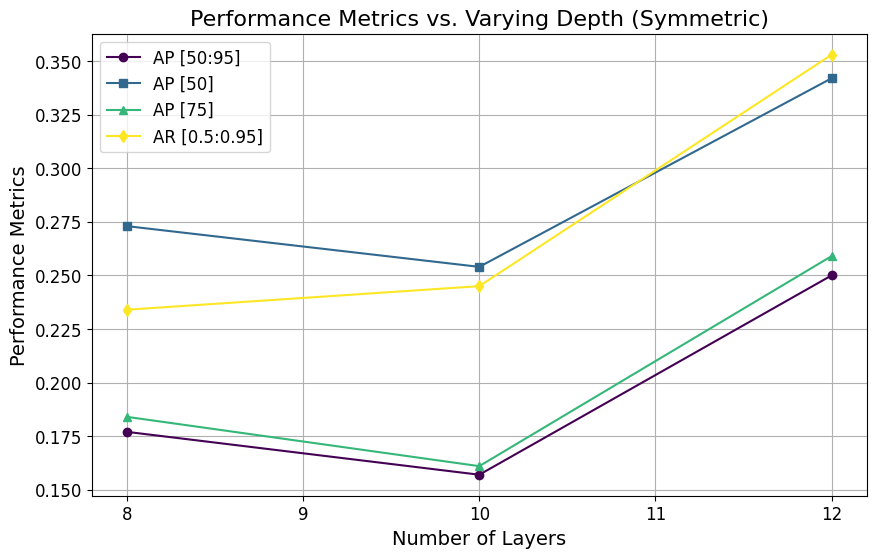

In [63]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Data for symmetric
layers = [8, 10, 12]
ap_50_95_depth = [0.177, 0.157, 0.250]
ap_50_depth = [0.273, 0.254, 0.342]
ap_75_depth = [0.184, 0.161, 0.259]
ar_05_095_depth = [0.234, 0.245, 0.353]

# # Data for all
# layers = [8, 10, 10, 12, 12]
# ap_50_95_depth = [0.177, 0.157, 0.202, 0.250, 0.161]
# ap_50_depth = [0.273, 0.254, 0.302, 0.342, 0.254]
# ap_75_depth = [0.184, 0.161, 0.219, 0.259, 0.167]
# ar_05_095_depth = [0.234, 0.245, 0.271, 0.353, 0.298]

# Use the viridis colormap
colors = cm.viridis(np.linspace(0, 1, 4))

# Font sizes
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 12
tick_fontsize = 12

plt.figure(figsize=(10, 6))
plt.plot(layers, ap_50_95_depth, marker='o', color=colors[0], label='AP [50:95]')
plt.plot(layers, ap_50_depth, marker='s', color=colors[1], label='AP [50]')
plt.plot(layers, ap_75_depth, marker='^', color=colors[2], label='AP [75]')
plt.plot(layers, ar_05_095_depth, marker='d', color=colors[3], label='AR [0.5:0.95]')

plt.xlabel('Number of Layers', fontsize=label_fontsize)
plt.ylabel('Performance Metrics', fontsize=label_fontsize)
plt.title('Performance Metrics vs. Varying Depth (Symmetric)', fontsize=title_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.grid(True)

# Set tick parameters
plt.xticks(ticks=np.arange(min(layers), max(layers) + 1), fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

plt.show()


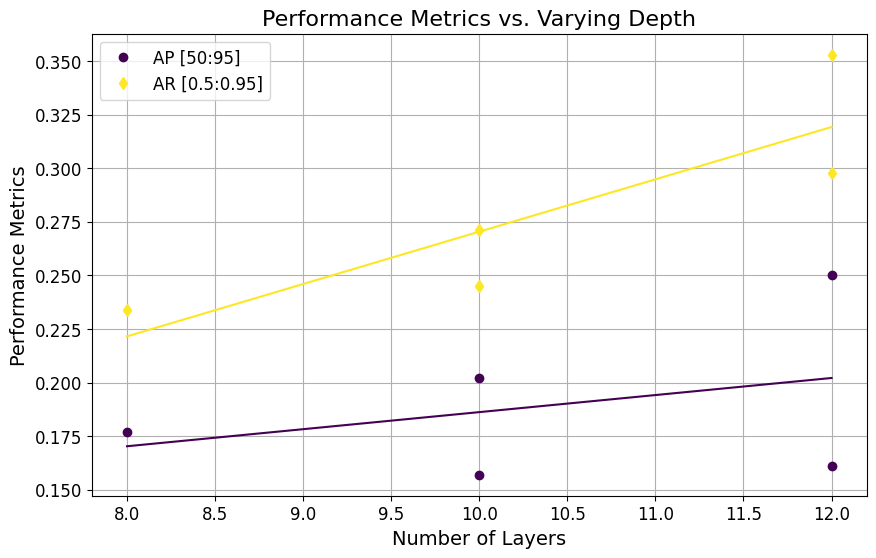

In [57]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Data for all
layers = [8, 10, 10, 12, 12]
ap_50_95_depth = [0.177, 0.157, 0.202, 0.250, 0.161]
# ap_50_depth = [0.273, 0.254, 0.302, 0.342, 0.254]
# ap_75_depth = [0.184, 0.161, 0.219, 0.259, 0.167]
ar_05_095_depth = [0.234, 0.245, 0.271, 0.353, 0.298]

# Use the viridis colormap
colors = cm.viridis(np.linspace(0, 1, 2))

# Fit lines
fit_ap_50_95 = np.polyfit(layers, ap_50_95_depth, 1)
# fit_ap_50 = np.polyfit(layers, ap_50_depth, 1)
# fit_ap_75 = np.polyfit(layers, ap_75_depth, 1)
fit_ar_05_095 = np.polyfit(layers, ar_05_095_depth, 1)

# Generate points for the best fit lines
layers_fit = np.linspace(min(layers), max(layers), 100)
ap_50_95_fit = np.polyval(fit_ap_50_95, layers_fit)
# ap_50_fit = np.polyval(fit_ap_50, layers_fit)
# ap_75_fit = np.polyval(fit_ap_75, layers_fit)
ar_05_095_fit = np.polyval(fit_ar_05_095, layers_fit)

# Font sizes
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 12
tick_fontsize = 12

plt.figure(figsize=(10, 6))
plt.plot(layers, ap_50_95_depth, marker='o', linestyle='', color=colors[0], label='AP [50:95]')
plt.plot(layers_fit, ap_50_95_fit, color=colors[0], linestyle='-')
# plt.plot(layers, ap_50_depth, marker='s', linestyle='', color=colors[1], label='AP [50]')
# plt.plot(layers_fit, ap_50_fit, color=colors[1], linestyle='-', label='AP [50] Fit')
# plt.plot(layers, ap_75_depth, marker='^', linestyle='', color=colors[2], label='AP [75]')
# plt.plot(layers_fit, ap_75_fit, color=colors[2], linestyle='-', label='AP [75] Fit')
plt.plot(layers, ar_05_095_depth, marker='d', linestyle='', color=colors[1], label='AR [0.5:0.95]')
plt.plot(layers_fit, ar_05_095_fit, color=colors[1], linestyle='-')

plt.xlabel('Number of Layers', fontsize=label_fontsize)
plt.ylabel('Performance Metrics', fontsize=label_fontsize)
plt.title('Performance Metrics vs. Varying Depth', fontsize=title_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.grid(True)

# Set tick parameters
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

plt.show()



### Changing heads

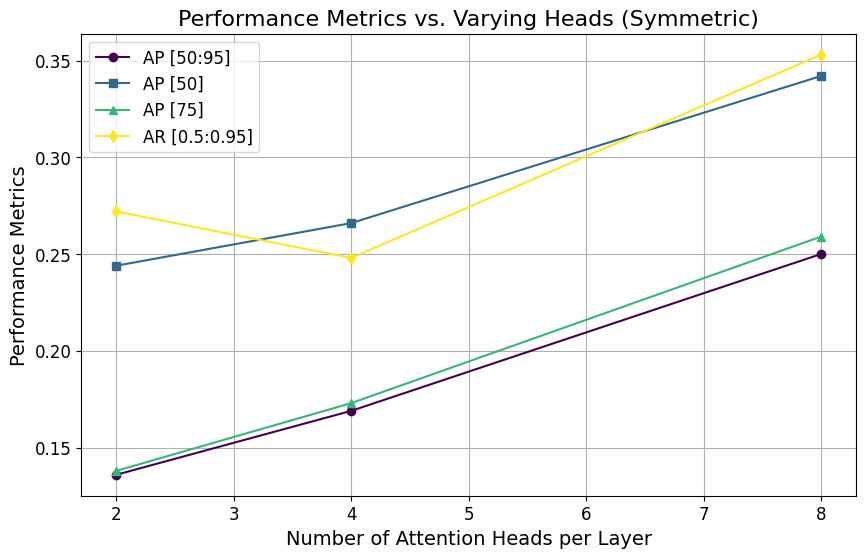

In [64]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Data for Varying Heads
heads = [2, 4, 8]
ap_50_95_heads = [0.136, 0.169, 0.250]
ap_50_heads = [0.244, 0.266, 0.342]
ap_75_heads = [0.138, 0.173, 0.259]
ar_05_095_heads = [0.272, 0.248, 0.353]

# Use the viridis colormap
colors = cm.viridis(np.linspace(0, 1, 4))

# Font sizes
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 12
tick_fontsize = 12

plt.figure(figsize=(10, 6))
plt.plot(heads, ap_50_95_heads, marker='o', color=colors[0], label='AP [50:95]')
plt.plot(heads, ap_50_heads, marker='s', color=colors[1], label='AP [50]')
plt.plot(heads, ap_75_heads, marker='^', color=colors[2], label='AP [75]')
plt.plot(heads, ar_05_095_heads, marker='d', color=colors[3], label='AR [0.5:0.95]')

plt.xlabel('Number of Attention Heads per Layer', fontsize=label_fontsize)
plt.ylabel('Performance Metrics', fontsize=label_fontsize)
plt.title('Performance Metrics vs. Varying Heads (Symmetric)', fontsize=title_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.grid(True)

# Set tick parameters
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

plt.show()


### Asymmetric models

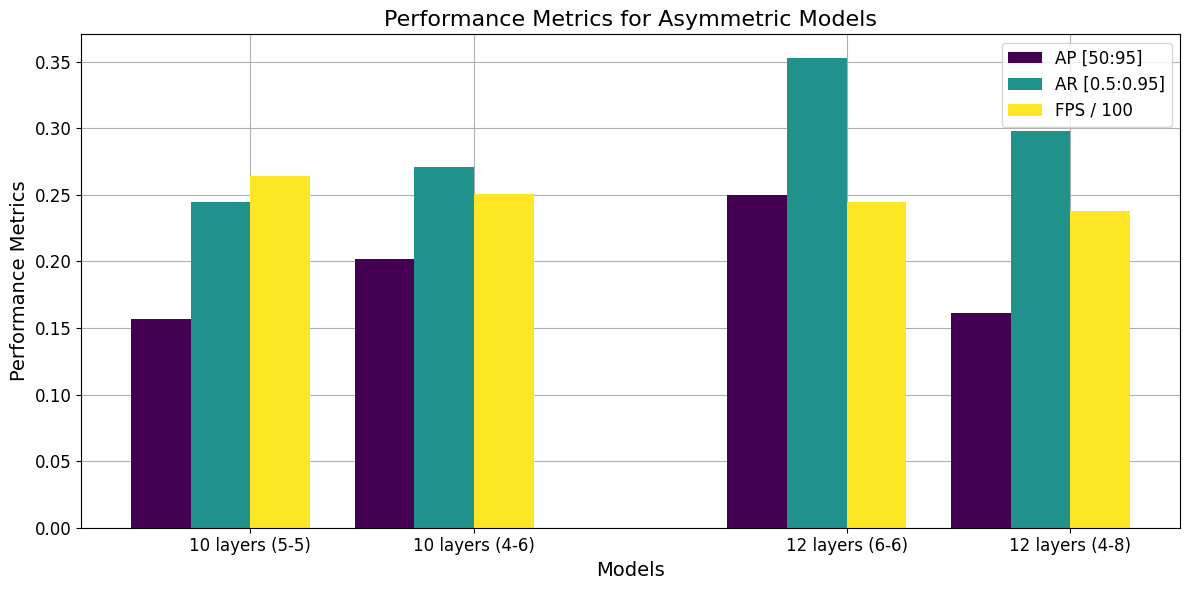

In [65]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Data for Asymmetric Models
asymmetric_models = ['10 layers (5-5)', '10 layers (4-6)', '12 layers (6-6)', '12 layers (4-8)']
ap_50_95_asym = [0.157, 0.202, 0.250, 0.161]
ar_05_095_asym = [0.245, 0.271, 0.353, 0.298]
FPS = [26.4, 25.1, 24.5, 23.8]
FPS = [value / 100 for value in FPS]

# Custom x positions with extra space between the groups
x = np.array([0, 0.75, 2, 2.75])
width = 0.2  # the width of the bars

# Use the viridis colormap
colors = cm.viridis(np.linspace(0, 1, 3))

# Font sizes
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 12
tick_fontsize = 12

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - 1.5*width, ap_50_95_asym, width, color=colors[0], label='AP [50:95]')
rects2 = ax.bar(x - 0.5*width, ar_05_095_asym, width, color=colors[1], label='AR [0.5:0.95]')
rects3 = ax.bar(x + 0.5*width, FPS, width, color=colors[2], label='FPS / 100')

ax.set_xlabel('Models', fontsize=label_fontsize)
ax.set_ylabel('Performance Metrics', fontsize=label_fontsize)
ax.set_title('Performance Metrics for Asymmetric Models', fontsize=title_fontsize)
ax.set_xticks(x)
ax.set_xticklabels(asymmetric_models, fontsize=tick_fontsize)
ax.legend(fontsize=legend_fontsize)

ax.set_axisbelow(True)  # Ensure gridlines are behind the bars
ax.grid(True)

# Set tick parameters
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

fig.tight_layout()
plt.grid(True)
plt.show()




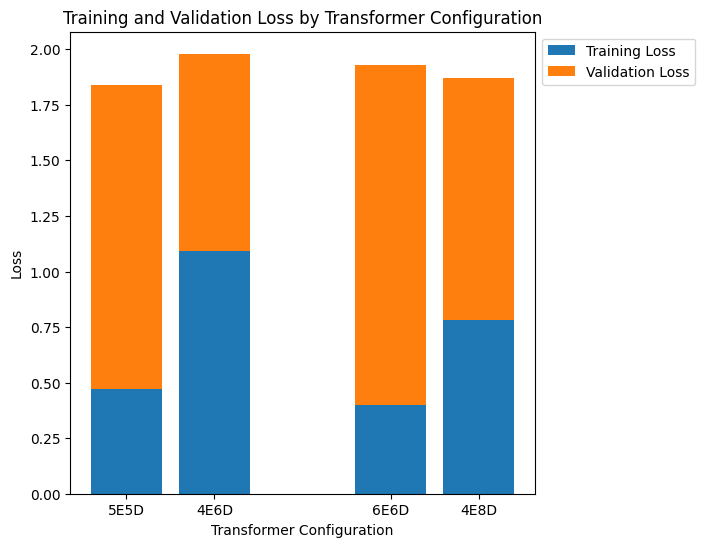

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Example data including new transformers with 12 layers
data = [
    ["5E5D", 0.47, 1.84],
    ["4E6D", 1.09, 1.98],
    ["6E6D", 0.40, 1.93],
    ["4E8D", 0.78, 1.87]
]

# Convert data to numpy arrays for easy manipulation
labels = [row[0] for row in data]
training_loss = np.array([row[1] for row in data])
validation_loss = np.array([row[2] for row in data])

# Determine the positions for the grouped bars
grouped_positions = np.array([0, 0.5, 1.5, 2])

# Plotting the data
fig, ax = plt.subplots(figsize=(6, 6))

bar_width = 0.4

# Use nicer colour tones
training_color = '#1f77b4'  # A softer blue tone
validation_color = '#ff7f0e'  # A softer orange tone

# Create bars for training and validation loss
bars1 = ax.bar(grouped_positions, training_loss, bar_width, label='Training Loss', color=training_color)
bars2 = ax.bar(grouped_positions, validation_loss - training_loss, bar_width, bottom=training_loss, label='Validation Loss', color=validation_color)

# Add labels, title, and legend
ax.set_xlabel('Transformer Configuration')
ax.set_ylabel('Loss')
ax.set_title('Training and Validation Loss by Transformer Configuration')
ax.set_xticks(grouped_positions)
ax.set_xticklabels(labels)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()

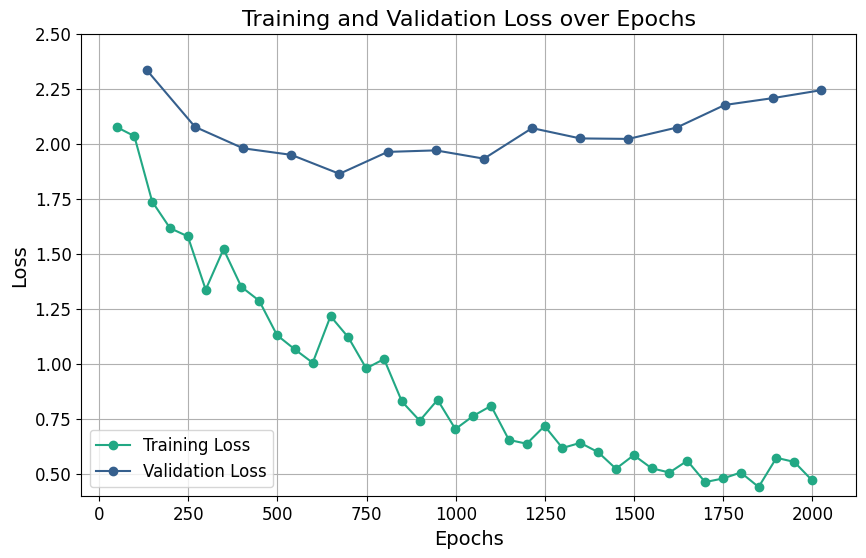

In [66]:
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Load the training loss JSON file
training_file_path = r'C:\Users\jayan\Downloads\training_json.json'
with open(training_file_path, 'r') as file:
    training_data = json.load(file)

# Load the validation loss JSON file
validation_file_path = r'C:\Users\jayan\Downloads\validation_json.json'
with open(validation_file_path, 'r') as file:
    validation_data = json.load(file)

# Extract epochs and loss values from both datasets
train_timestamps, train_epochs, train_losses = zip(*training_data)
val_timestamps, val_epochs, val_losses = zip(*validation_data)

# Font sizes
title_fontsize = 16
label_fontsize = 14
legend_fontsize = 12
tick_fontsize = 12

# Plotting the loss graph with viridis color map
plt.figure(figsize=(10, 6))
plt.plot(train_epochs, train_losses, marker='o', color=cm.viridis(0.6), label='Training Loss')
plt.plot(val_epochs, val_losses, marker='o', color=cm.viridis(0.3), label='Validation Loss')
plt.xlabel('Epochs', fontsize=label_fontsize)
plt.ylabel('Loss', fontsize=label_fontsize)
plt.ylim(0.4, 2.5)  # Set the y-axis range
plt.title('Training and Validation Loss over Epochs', fontsize=title_fontsize)
plt.legend(fontsize=legend_fontsize)
plt.grid(True)

# Set tick parameters
plt.xticks(fontsize=tick_fontsize)
plt.yticks(fontsize=tick_fontsize)

plt.show()


